In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
%matplotlib inline
pd.options.mode.chained_assignment = None

Data Exploration

In [4]:
df_train = pd.read_csv('../titanic/train.csv')
df_test = pd.read_csv('../titanic/test.csv')
df_submit = pd.read_csv('../titanic/gender_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Combine train and test to data - Concat

In [10]:
data = pd.concat([df_test, df_train], ignore_index = True)
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


Data Dictionary

| Columns  |   Definition                                 | DataType |  Key                                           |
|:---------|:---------------------------------------------|:---------|:-----------------------------------------------|
| Survival |   Survival                                   | int64    | 0 = No, 1 = Yes                                |
| Pclass   |   Ticket class                               | int64    | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Name     |   Passenger's Name                           | Object   |                                                |
| Sex      |   Sex                                        | object   | male, famle                                    |
| Age      |   Age in years                               | float64  |                                                |
| Sibsp    |   # of siblings / spouses aboard the Titanic | int64    |                                                |
| Parch    |   # of parents / children aboard the Titanic | int64    |                                                |
| Ticket   |   Ticket number                              | object   |                                                |
| Fare     |   Passenger fare                             | float64  |                                                |
| Cabin    |   Cabin number                               | object   |                                                | 
| Embarked |   Port of Embarkation                        | object   | C = Cherbourg, Q = Queenstown, S = Southampton | 

In [11]:
data.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Data Analysis

In [13]:
data["Survived"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

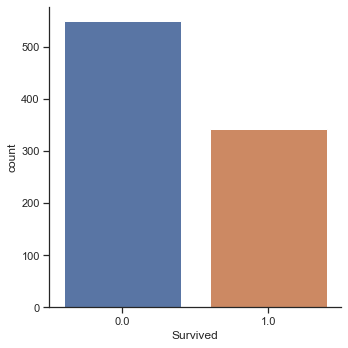

In [14]:
sns.set_theme(style="ticks", color_codes=True)

#draw data["Survived"] by count
#false alarm /alarm false
sns.catplot(x="Survived", kind="count", data=data)

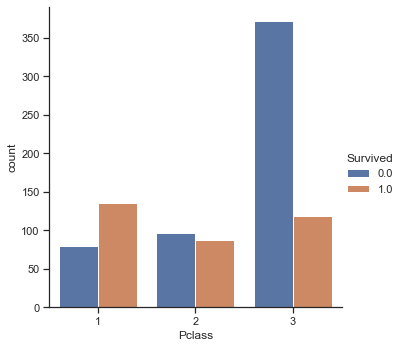

In [15]:
sns.catplot(x="Pclass", kind="count", hue="Survived", data=data)

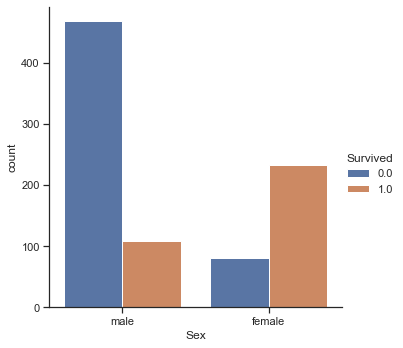

In [16]:
sns.catplot(x="Sex", kind="count", hue="Survived", data=data)

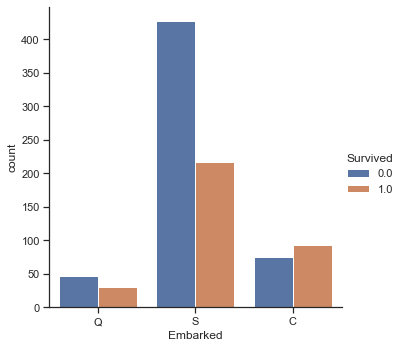

In [17]:
sns.catplot(x="Embarked", kind="count", hue="Survived", data=data)

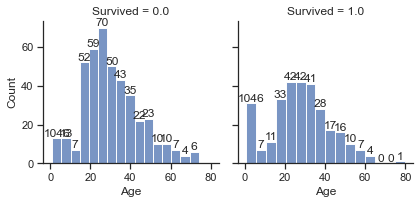

In [18]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.histplot, "Age", kde=False)

for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{data.Age.count()}']
        ax.bar_label(c, labels=labels, label_type='edge')

Observation dataframe by SQL

In [200]:
pip install -U pandasql

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 311.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 kB 1.1 MB/s eta 0:00:0000:0100:01
Using legacy 'setup.py install' for pandasql, since package 'wheel' is not installed.
  Running setup.py install for pandasql ... done
Note: you may need to restart the kernel to use updated packages.


In [208]:
from pandasql import sqldf
pysqldf = lambda x: sqldf(x, globals())

In [209]:
pysqldf("""select *
           from data
           limit 5""")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,None,Q,None
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,None,S,None
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,None,Q,None
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,None,S,None
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,None,S,None


In [210]:
pysqldf("""select distinct Sex
           from data
        """)

,Sex
0,male
1,female


In [211]:
pysqldf("""select distinct Survived
           from data
        """)

,Survived
0,NaN
1,0.0
2,1.0


In [247]:
pysqldf("""select Survived, count(*)
           from data
           group by Survived""")

,Survived,count(*)
0,NaN,418
1,0.0,549
2,1.0,342


In [246]:
pysqldf("""
          select 
           Survived,
           case when Age between 0  and 10 then '0-10'
                when Age between 11 and 20 then '11-20'
                when Age between 21 and 30 then '21-30'
                when Age between 31 and 40 then '31-40'
                when Age between 41 and 50 then '41-50'
                when Age between 51 and 60 then '51-60'
                when Age between 61 and 70 then '61-70'
                when Age between 71 and 80 then '71-80'
            else 'over 80'
            end as range
            ,count(*)
            from data
            group by Survived, range
            
            """)

,Survived,range,count(*)
0,NaN,0-10,22
1,NaN,11-20,47
2,NaN,21-30,131
3,NaN,31-40,55
4,NaN,41-50,45
5,NaN,51-60,20
6,NaN,61-70,9
7,NaN,71-80,1
8,NaN,over 80,88
9,0.0,0-10,26


In [250]:
pysqldf("""select Sibsp, count(*)
           from data
           group by Sibsp""")

,SibSp,count(*)
0,0,891
1,1,319
2,2,42
3,3,20
4,4,22
5,5,6
6,8,9


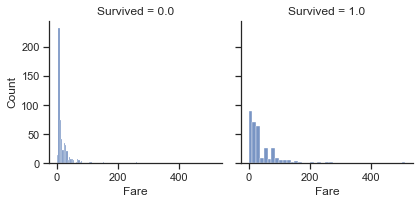

In [19]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'Fare',kde=False)

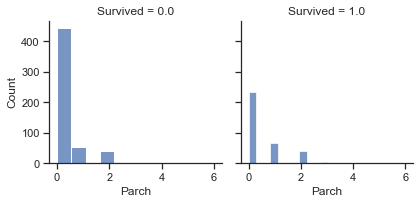

In [20]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'Parch',kde=False)

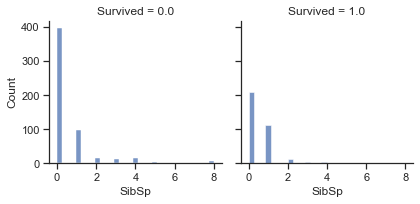

In [21]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'SibSp',kde=False)

In [22]:
data['Family_Size']  = data['Parch'] + data['SibSp']

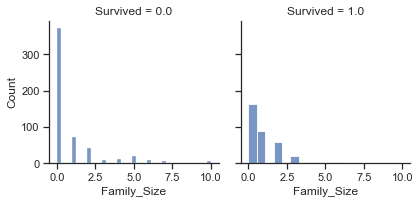

In [23]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'Family_Size',kde=False)

 Feature Engineering

In [24]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]

In [25]:
data['Name'].str.split(", ", expand = True).head(5)

,0,1
0,Kelly,Mr. James
1,Wilkes,Mrs. James (Ellen Needs)
2,Myles,Mr. Thomas Francis
3,Wirz,Mr. Albert
4,Hirvonen,Mrs. Alexander (Helga E Lindqvist)


In [26]:
data['Title1'].head(3)

0                   Mr. James
1    Mrs. James (Ellen Needs)
2          Mr. Thomas Francis
Name: Title1, dtype: object

In [27]:
data['Title1'] = data['Title1'].str.split(".", expand = True)[0]
data['Title1'].head(5)

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title1, dtype: object

In [28]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona',
       'Don', 'Mme', 'Major', 'Lady', 'Sir', 'Mlle', 'Capt',
       'the Countess', 'Jonkheer'], dtype=object)

In [29]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap ='Blues')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [30]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap ='Blues')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.000000,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.000000,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [31]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [32]:
data.groupby(['Title1', 'Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [33]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major', 'Lady','the Countess', 'Jonkheer','Col','Rev','Capt','Don','Sir','Dona'],
                                        ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr', 'Mrs'])

In [34]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [35]:
data.groupby(['Title2'])['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [36]:
data.groupby(['Title2', 'Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [37]:
list(data.groupby(['Title2', 'Pclass'])['Age'].mean().iteritems())[:3]

[(('Master', 1), 6.984),
 (('Master', 2), 2.7572727272727273),
 (('Master', 3), 6.090000000000001)]

In [38]:
 pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap ='Blues')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [39]:
 pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap ='Blues')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.000000,17,55,451,26
1.000000,23,130,87,102


In [40]:
data['Ticket'].head(30)

0               330911
1               363272
2               240276
3               315154
4              3101298
5                 7538
6               330972
7               248738
8                 2657
9            A/4 48871
10              349220
11                 694
12               21228
13               24065
14         W.E.P. 5734
15       SC/PARIS 2167
16              233734
17                2692
18    STON/O2. 3101270
19                2696
20            PC 17603
21             C 17368
22            PC 17598
23            PC 17597
24            PC 17608
25           A/5. 3337
26              113509
27                2698
28              113054
29                2662
Name: Ticket, dtype: object

In [41]:
data['Ticket_Info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/", "").strip().split(' ')[0] if not x.isdigit() else 'X')

In [42]:
data['Ticket_Info'].unique()

array(['X', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3', 'SP', 'SOP', 'Fa', 'LINE', 'SWPP', 'SCOW',
       'PPP', 'AS', 'CASOTON'], dtype=object)

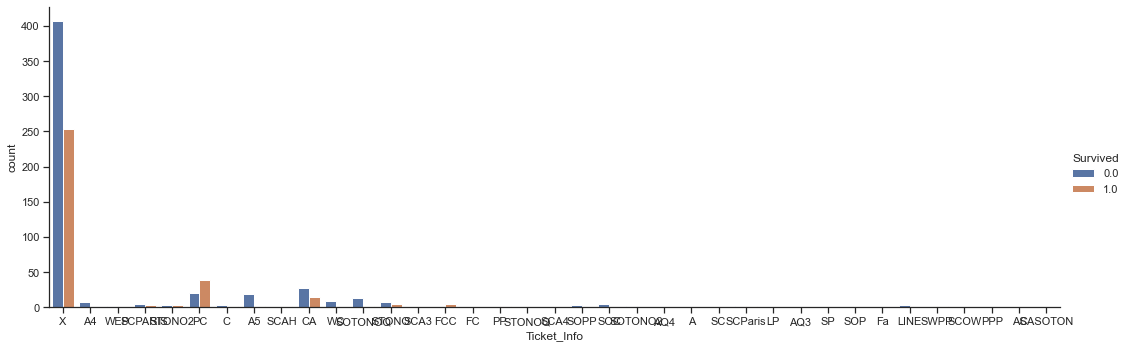

In [43]:
sns.catplot(x="Ticket_Info", kind="count", hue="Survived", data=data, height=5, aspect=3)

Missing Value: Age, Fare, Embarked, Cabin

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_Info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


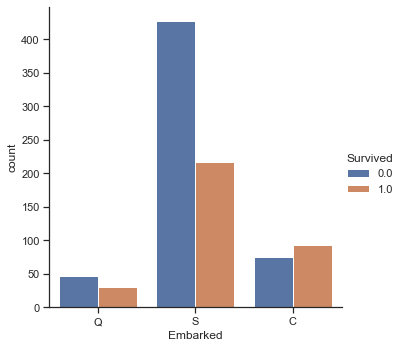

In [45]:
sns.catplot(x="Embarked", kind="count", hue="Survived", data=data)

In [46]:
data['Embarked'] = data['Embarked'].fillna('S')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Survived     891 non-null    float64
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_Info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [48]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Survived     891 non-null    float64
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_Info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [50]:
data['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [51]:
data['Cabin'] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [52]:
data['Cabin'].unique()

array(['NoCabin', 'B', 'E', 'A', 'C', 'D', 'F', 'G', 'T'], dtype=object)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     891 non-null    float64
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_Info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


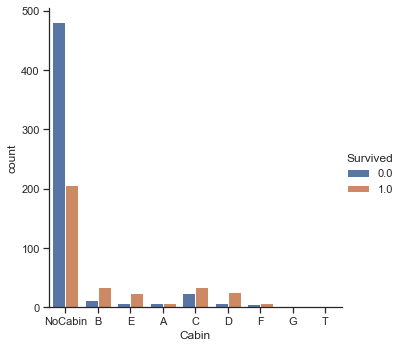

In [54]:
sns.catplot(x="Cabin", kind="count", hue="Survived", data=data)

Convert Features to Number for Maching Learing

In [55]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_Info'] = data['Ticket_Info'].astype('category').cat.codes

In [56]:
data.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family_Size,Title1,Title2,Ticket_Info
0,892,2,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,7,1,NaN,0,12,2,36
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,7,2,NaN,1,13,3,36
2,894,1,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,7,1,NaN,0,12,2,36
3,895,2,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,7,2,NaN,0,12,2,36
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,7,2,NaN,2,13,3,36
5,897,2,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,7,2,NaN,0,12,2,36
6,898,2,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,7,1,NaN,0,9,1,36
7,899,1,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,7,2,NaN,2,12,2,36
8,900,2,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,7,0,NaN,0,13,3,36
9,901,2,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,7,2,NaN,2,12,2,1


In [57]:
dataAgeNull = data[data['Age'].isnull()]
dataAgeNotNull = data[data['Age'].notnull()]

In [58]:
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull['Fare']-dataAgeNotNull['Fare'].mean())>(4*dataAgeNotNull['Fare'] .std()))|
                                (np.abs(dataAgeNotNull['Family_Size']-dataAgeNotNull['Family_Size'].mean())>(4*dataAgeNotNull['Family_Size'].std()))
                               ]                          

In [59]:
rfModel_age = RandomForestRegressor(n_estimators=2000, random_state =42)
ageColumns = ['Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2', 'Cabin', 'Ticket_Info']

In [60]:
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier['Age'])
ageNullValues = rfModel_age.predict(X = dataAgeNull[ageColumns])

dataAgeNull.loc[:,"Age"] = ageNullValues
data = pd.concat([dataAgeNull, dataAgeNotNull])

In [61]:
dataSurvived = data.groupby('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family_Size,Title1,Title2,Ticket_Info
10,902,2,"Ilieff, Mr. Ylio",1,38.920799,0,0,349220,7.8958,7,2,NaN,0,12,2,36
22,914,0,"Flegenheim, Mrs. Alfred (Antoinette)",0,46.327992,0,0,PC 17598,31.6833,7,2,NaN,0,13,3,14
29,921,2,"Samaan, Mr. Elias",1,42.123724,2,0,2662,21.6792,7,0,NaN,2,12,2,36
33,925,2,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",0,46.715981,1,2,W./C. 6607,23.4500,7,2,NaN,3,13,3,34
36,928,2,"Roth, Miss. Sarah A",0,33.942747,0,0,342712,8.0500,7,2,NaN,0,9,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,886,2,"Rice, Mrs. William (Margaret Norton)",0,39.000000,0,5,382652,29.1250,7,1,0.0,5,13,3,36
1304,887,1,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,2,0.0,0,15,2,36
1305,888,0,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,2,1.0,0,9,1,36
1307,890,0,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,1.0,0,12,2,36


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 10 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int8   
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   int8   
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   int8   
 10  Embarked     1309 non-null   int8   
 11  Survived     891 non-null    float64
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   int8   
 14  Title2       1309 non-null   int8   
 15  Ticket_Info  1309 non-null   int8   
dtypes: float64(3), int64(4), int8(7), object(2)
memory usage: 111.2+ KB


In [195]:
dataTrain = data[pd.notna(data['Survived'])].sort_values(by=['PassengerId'])

In [196]:
dataTrain.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Family_Size',
       'Title1', 'Title2', 'Ticket_Info'],
      dtype='object')

In [197]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2', 'Ticket_Info', 'Cabin']]
dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_Info,Cabin
418,0.0,22.00000,2,7.2500,2,1,1,2,2,7
419,1.0,38.00000,0,71.2833,0,0,1,3,14,2
420,1.0,26.00000,2,7.9250,2,0,0,1,31,7
421,1.0,35.00000,2,53.1000,0,0,1,3,36,2
422,0.0,35.00000,2,8.0500,2,1,0,2,36,7
...,...,...,...,...,...,...,...,...,...,...
1304,0.0,27.00000,2,13.0000,1,1,0,2,36,7
1305,1.0,19.00000,2,30.0000,0,0,0,1,36,1
1306,0.0,19.18909,2,23.4500,2,0,3,1,34,7
1307,1.0,26.00000,0,30.0000,0,1,0,2,36,2


In [198]:
dataTest = data[pd.isna(data['Survived'])].sort_values(by=['PassengerId'])
dataTest.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Family_Size',
       'Title1', 'Title2', 'Ticket_Info'],
      dtype='object')

In [199]:
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2', 'Ticket_Info', 'Cabin']]
dataTest

,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_Info,Cabin
0,34.500000,1,7.8292,2,1,0,2,36,7
1,47.000000,2,7.0000,2,0,1,3,36,7
2,62.000000,1,9.6875,1,1,0,2,36,7
3,27.000000,2,8.6625,2,1,0,2,36,7
4,22.000000,2,12.2875,2,0,2,3,36,7
...,...,...,...,...,...,...,...,...,...
413,33.919574,2,8.0500,2,1,0,2,2,7
414,39.000000,0,108.9000,0,0,0,3,14,2
415,38.500000,2,7.2500,2,1,0,2,28,7
416,38.920799,2,8.0500,2,1,0,2,36,7


Model training

In [200]:
from sklearn.model_selection import GridSearchCV

In [201]:
#GridSearch

rf = RandomForestClassifier(oob_score= True, random_state = 1, n_jobs = -1)
param_grid = {"criterion" : ["gini","entropy"], 
                             "min_samples_leaf" : [1, 5, 10],
                             "min_samples_split" : [2, 4, 10, 12]
             }
gs = GridSearchCV(estimator=rf, param_grid = param_grid, scoring = "accuracy",  cv=3, n_jobs = -1)
                  
gs = gs.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])      
                  
print(gs.best_score_)                  
print(gs.best_params_)                  

0.8249158249158249
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rf = RandomForestClassifier(criterion = 'gini',
                                        n_estimators = 1000,
                                        min_samples_split=4,
                                        min_samples_leaf=12,
                                        oob_score=True,
                                        random_state = 1,
                                        n_jobs = -1 )
rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])

RandomForestClassifier(min_samples_leaf=12, min_samples_split=4,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=1)

In [204]:
print("%.4f" % rf.oob_score_)

0.8238


In [205]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']),
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])),
           axis = 1).sort_values(by = 'importance', ascending = False)[: 20]

,variable,importance
4,Sex,0.361041
6,Title2,0.188974
2,Fare,0.114987
3,Pclass,0.107294
0,Age,0.071318
8,Cabin,0.068421
5,Family_Size,0.057958
1,Embarked,0.018204
7,Ticket_Info,0.011803


In [206]:
dataSurvivedIsNull = data[pd.isna(data['Survived'])].sort_values(by=['PassengerId'])

In [215]:
rf_res = rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit['PassengerId'] = dataSurvivedIsNull['PassengerId']

In [216]:
submit

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [218]:
submit.to_csv('submit.csv', index = False)